In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or '3' to suppress all INFO and WARNING messages
import tensorflow as tf

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_openml
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pandas_profiling
import seaborn as sns
import datetime as dt

In [4]:
# Set the default plot size
plt.rcParams['figure.figsize'] = [15, 8]
# set a grid for each plot too
sns.set_style("whitegrid")

In [5]:
path="/Users/ud/Downloads/solar_weather[1].csv"
df=pd.read_csv(path)

In [6]:
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


In [7]:
df.describe(include='all')

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
unique,196776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,NaN,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,NaN,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,NaN,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,NaN,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [9]:
#Change dataframe index to datetime
df.index = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')
df = df.drop('Time', axis='columns')

In [10]:
#converting time data to time signal
df['timestamp'] = df.index.map(pd.Timestamp.timestamp)
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month,timestamp
Time,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483229e+09
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483230e+09
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483231e+09
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1,1.483232e+09
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1,1.483232e+09


These sine and cosine transformations are useful for encoding cyclical patterns that repeat over time, such as daily and annual seasonality. By representing time-related features in this way, machine learning models can better capture these periodic patterns when making predictions or conducting time series analysis.
In the code you provided, sine and cosine transformations of the 'timestamp' feature are used to represent daily and annual patterns. By having both sine and cosine components, you can capture variations in both the phase (timing) and amplitude (intensity) of these cyclic patterns. This is particularly valuable when analyzing time series data and building models that need to account for the cyclical nature of the data, such as seasonal decomposition or forecasting models.

In [11]:
day = 60 * 60 * 24  # Number of seconds in a day
year = 365.2425 * day  # Number of seconds in a year (considering leap years)

# Create new columns for sine and cosine transformations of time-related features
df['day sin'] = np.sin(df['timestamp'] * (2 * np.pi/day))
df['day cos'] = np.cos(df['timestamp'] * (2 * np.pi/day))
df['year sin'] = np.sin(df['timestamp'] * (2 * np.pi/year))
df['year cos'] = np.cos(df['timestamp'] * (2 * np.pi/year))


In [12]:
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,...,dayLength,SunlightTime/daylength,weather_type,hour,month,timestamp,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483229e+09,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483230e+09,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483231e+09,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,...,450,0.0,4,0,1,1.483232e+09,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,...,450,0.0,4,1,1,1.483232e+09,2.588190e-01,0.965926,0.011081,0.999939


In [13]:
df = df.drop(['timestamp', 'hour', 'month'], axis='columns')
df.head()

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,day sin,day cos,year sin,year cos
Time,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,2.504006e-13,1.000000,0.010364,0.999946
2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,6.540313e-02,0.997859,0.010544,0.999944
2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.305262e-01,0.991445,0.010723,0.999943
2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,1.950903e-01,0.980785,0.010902,0.999941
2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,2.588190e-01,0.965926,0.011081,0.999939


In [14]:
# Any nulls - no
df.isna().sum()

Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
day sin                   0
day cos                   0
year sin                  0
year cos                  0
dtype: int64

In [15]:
df.index.min(),df.index.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2022-08-31 17:45:00'))

Time of the dataset ranges hourly from '2017-01-01 00:00:00' to '2022-08-31 17:45:00'¶

In [16]:
# Split the dataset into features (X) and target (y)
X = df.drop('Energy delta[Wh]', axis=1)  # Assuming 'Energy delta[Wh]' is the target variable
y = df['Energy delta[Wh]']

In [17]:
from sklearn.model_selection import train_test_split
X_validation, _, y_validation, _ = train_test_split(X, y, test_size=0.9, shuffle=False)

In [18]:
# Specify the date for splitting
split_date = '2022-01-01'

# Split the datasets based on the date
X_train = X[X.index < split_date]
y_train = y[y.index < split_date]

X_test = X[X.index >= split_date]
y_test = y[y.index >= split_date]

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.fit_transform(X_test)

In [22]:
X_validation = scaler.fit_transform(X_validation)

In [23]:
for value in X_train[1:5]:
    print(value)

[0.         0.34732824 0.6119403  1.         0.37692308 0.
 0.         1.         0.         0.         0.         0.
 0.75       0.53270156 0.99892946 0.50527184 0.99997221]
[0.         0.34732824 0.6119403  1.         0.37692308 0.
 0.         1.         0.         0.         0.         0.
 0.75       0.5652631  0.99572243 0.50536143 0.99997125]
[0.         0.34732824 0.6119403  1.         0.37692308 0.
 0.         1.         0.         0.         0.         0.
 0.75       0.59754516 0.99039264 0.50545102 0.99997029]
[0.         0.34923664 0.59701493 1.         0.4        0.
 0.         1.         0.         0.         0.         0.
 0.75       0.62940952 0.98296291 0.50554061 0.9999693 ]


In [24]:
for value in y_train[1:5]:
    print(value)

0
0
0
0


In [25]:
for value in X_test[1:5]:
    print(value)

[0.         0.39716312 0.53623188 0.96153846 0.35211268 0.
 0.         1.         0.         0.         0.         0.
 0.75       0.53270156 0.99892946 0.46689016 0.99999939]
[0.         0.39716312 0.53623188 0.96153846 0.35211268 0.
 0.         1.         0.         0.         0.         0.
 0.75       0.5652631  0.99572243 0.46698635 0.99999877]
[0.         0.39716312 0.53623188 0.96153846 0.35211268 0.
 0.         1.         0.         0.         0.         0.
 0.75       0.59754516 0.99039264 0.46708255 0.99999812]
[0.         0.39716312 0.53623188 0.94871795 0.32394366 0.
 0.         1.         0.         0.         0.         0.
 0.75       0.62940952 0.98296291 0.46717874 0.99999747]


In [26]:
for value in y_test[1:5]:
    print(value)

0
0
0
0


In [27]:
X_validation.shape

(19677, 17)

In [28]:
X_train.shape

(174048, 17)

In [29]:
X_test.shape

(22728, 17)

In [30]:
gradientregressor = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate= 1.0)

In [31]:
model = gradientregressor.fit(X_train, y_train)

In [32]:
# Validate the ANN on the validation data
y_validation_predict = model.predict(X_validation)

# Test the ANN on the testing data
y_test_predict = model.predict(X_test)

# Calculate RMSE for evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
validation_rmse = np.sqrt(mean_squared_error(y_validation, y_validation_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Validation RMSE: {validation_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train RMSE: 406.0971
Validation RMSE: 438.8475
Test RMSE: 484.6941


In [33]:
test_predictions = model.predict(X_test)
val_predictions = model.predict(X_validation)
train_predictions = model.predict(X_train)

In [34]:
import numpy as np

# Set predicted negative values to zero
test_predictions[test_predictions < 0] = 0
val_predictions[val_predictions < 0] = 0
train_predictions[train_predictions < 0] = 0

In [35]:
for value in y_test[50:55]:
    print(value)

96
34
51
43
57


In [36]:
for value in test_predictions[50:55]:
    print(value)

1130.791896899753
1130.791896899753
364.2405112174641
364.2405112174641
364.2405112174641


In [38]:
import pandas as pd

# Create a DataFrame with y_test and test_predictions
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_predictions.flatten()})

# Assuming comparison_df is your DataFrame
print(comparison_df.iloc[10000:10051])  # Adjust the number inside head() to display more or fewer rows

                     Actual    Predicted
Time                                    
2022-04-21 04:00:00      25    42.552390
2022-04-21 04:15:00      51    42.552390
2022-04-21 04:30:00      88    42.552390
2022-04-21 04:45:00     145    42.552390
2022-04-21 05:00:00     146    42.552390
2022-04-21 05:15:00     239    42.552390
2022-04-21 05:30:00     379    42.552390
2022-04-21 05:45:00     421    42.552390
2022-04-21 06:00:00     551    42.552390
2022-04-21 06:15:00     743    42.552390
2022-04-21 06:30:00     641   809.103776
2022-04-21 06:45:00     659   809.103776
2022-04-21 07:00:00     628   809.103776
2022-04-21 07:15:00     897   809.103776
2022-04-21 07:30:00    1121   809.103776
2022-04-21 07:45:00    1020   809.103776
2022-04-21 08:00:00    1277   809.103776
2022-04-21 08:15:00    1264  1350.719611
2022-04-21 08:30:00    1274  2158.645605
2022-04-21 08:45:00    2828  2158.645605
2022-04-21 09:00:00    2530  2158.645605
2022-04-21 09:15:00    2039  2158.645605
2022-04-21 09:30

In [39]:
from sklearn.metrics import r2_score
# Print the accuracy
r_squared = r2_score(y_test, test_predictions)
print ("test data accuracy")
print(f'R-squared (R²): {r_squared:.4f}')

r_squared = r2_score(y_validation, val_predictions)
print ("validation data accuracy")
print(f'R-squared (R²): {r_squared:.4f}')

r_squared = r2_score(y_train, train_predictions)
print ("train data accuracy")
print(f'R-squared (R²): {r_squared:.4f}')

test data accuracy
R-squared (R²): 0.8198
validation data accuracy
R-squared (R²): 0.8376
train data accuracy
R-squared (R²): 0.8479


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
def plotPredictions(X, y, start=0, end=200):
    predictions = model.predict(X)
    predictions[predictions < 0] = 0
    predictions = np.hstack(predictions)
    predictions_df = pd.DataFrame(predictions, columns=["Predicted Values"])
    predictions_df.index = y.index
    plt.plot(y[start:end], label='Actual')
    plt.plot(predictions_df[start:end], label='Predicted')
    plt.legend()
    print(f'MSE {mean_squared_error(y, predictions):.2f}')
    print(f'MAE {mean_absolute_error(y, predictions):.2f}')
    spearman_stats = spearmanr(y, predictions)
    print(spearman_stats)


MSE 230944.62
MAE 254.13
SignificanceResult(statistic=0.7873964093662569, pvalue=0.0)


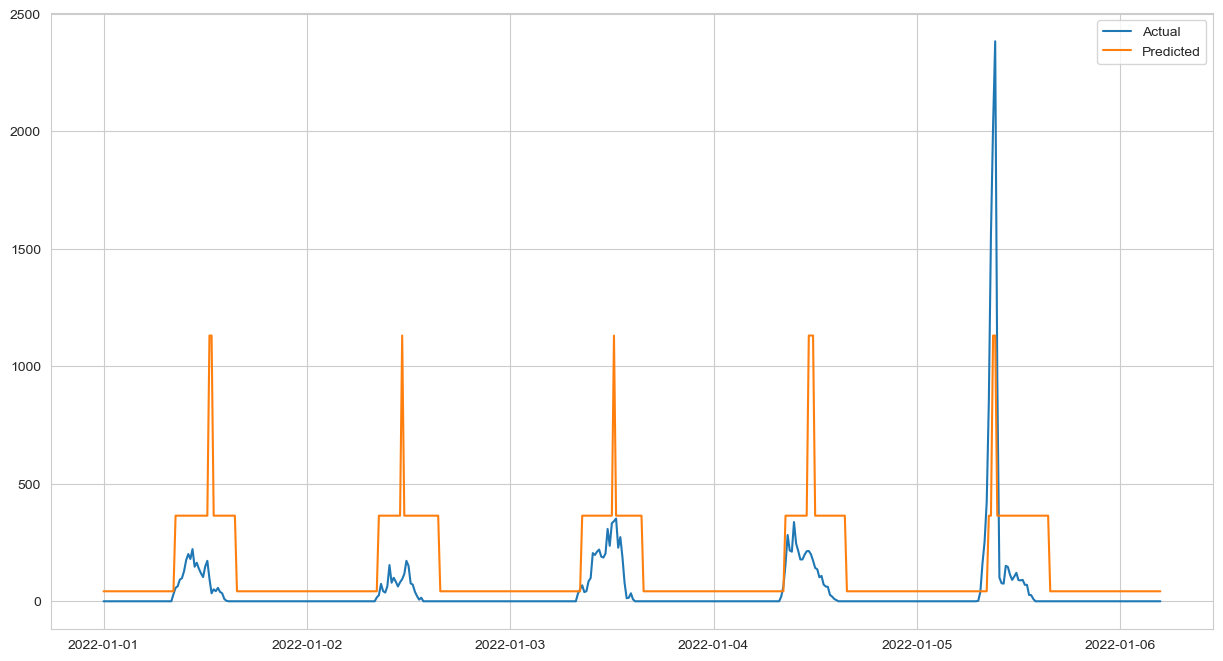

In [42]:
plt.figure(figsize=(15,8))
plotPredictions(X_test, y_test, start=0, end=500)

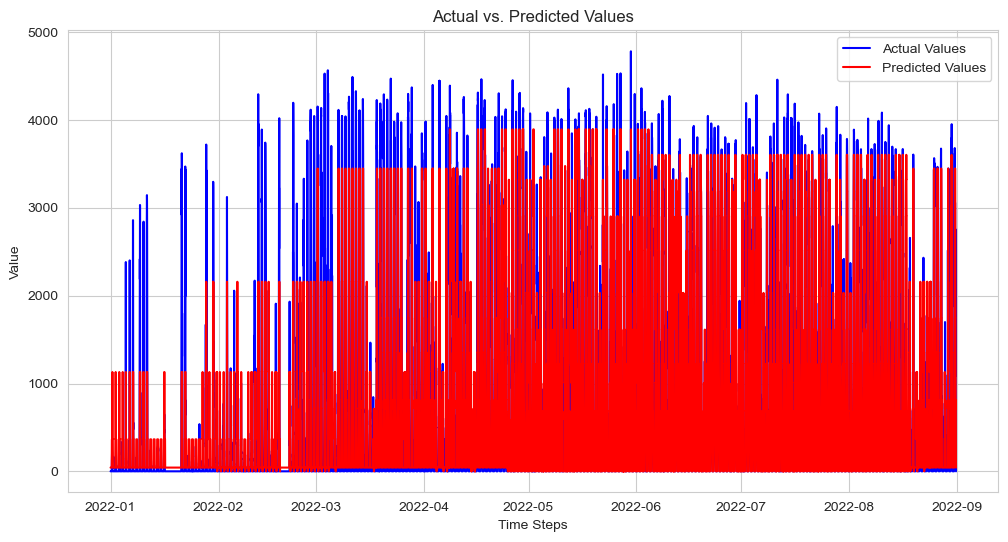

In [43]:
import matplotlib.pyplot as plt

# Plot the actual values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', color='blue')
test_predictions_df = pd.DataFrame(test_predictions, columns=["Predicted Values"])
test_predictions_df.index = y_test.index
plt.plot(test_predictions_df, label='Predicted Values', color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()